# Value iteration example

Value iteration is a dynamic programming algorithm that computes the optimal value function and the optimal policy for a Markov decision process (MDP). It is a "model-based" algorithm, meaning that it requires knowledge of the transition probabilities and rewards of the MDP.

## Imports

In [1]:
import numpy as np
import jax.numpy as jnp
from behavioural_modelling.planning.dynamic_programming import solve_value_iteration
import matplotlib.pyplot as plt


## Create a function to define a simple grid world environment

In [2]:
# Simple Gridworld setup
def create_gridworld(grid_size: int = 15, discount: float = 0.9, n_rewards: int = 1, seed: int = 42):

    # Initialise RNG
    rng = np.random.RandomState(seed)

    # Number of states and actions
    n_states = grid_size**2
    n_actions = 5  # up, down, left, right, stay

    # Reward function
    reward_function = np.zeros(n_states)
    for _ in range(n_rewards):
        reward_function[rng.randint(n_states)] = 1.0

    # Features matrix: Identity (each state is a feature)
    features = np.eye(n_states)

    # SAS matrix (state, action, state transition probabilities)
    sas = np.zeros((n_states, n_actions, n_states))

    # Create transition probabilities for a simple gridworld
    def state_to_coords(s, size):
        return s // size, s % size

    def coords_to_state(x, y, size):
        return x * size + y

    # Get the state transition probabilities
    for s in range(n_states):
        x, y = state_to_coords(s, grid_size)

        # Up
        if x > 0:
            sas[s, 0, coords_to_state(x - 1, y, grid_size)] = 1.0
        else:
            sas[s, 0, s] = 1.0  # Bump into wall

        # Down
        if x < grid_size - 1:
            sas[s, 1, coords_to_state(x + 1, y, grid_size)] = 1.0
        else:
            sas[s, 1, s] = 1.0  # Bump into wall

        # Left
        if y > 0:
            sas[s, 2, coords_to_state(x, y - 1, grid_size)] = 1.0
        else:
            sas[s, 2, s] = 1.0  # Bump into wall

        # Right
        if y < grid_size - 1:
            sas[s, 3, coords_to_state(x, y + 1, grid_size)] = 1.0
        else:
            sas[s, 3, s] = 1.0  # Bump into wall

        # Stay
        sas[s, 4, s] = 1.0

    return reward_function, features, sas, discount, n_states, n_actions

## Plot the gridworld environment

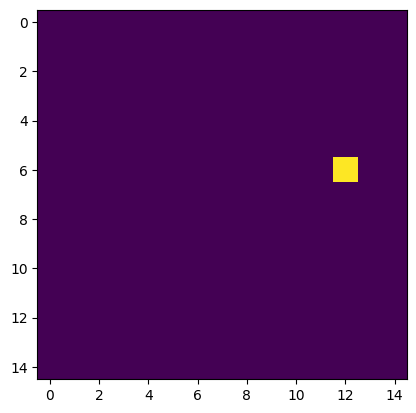

In [3]:
# Get Gridworld setup
reward_function, features, sas, discount, n_states, n_actions = create_gridworld()

# Plot
plt.imshow(reward_function.reshape(15, 15))

## Run the value iteration algorithm

In [4]:
# Parameters for the value iteration
max_iter = 1000
tol = 1e-4

# Solve 
values, q_values = solve_value_iteration(sas.shape[0], sas.shape[1], jnp.array(reward_function), max_iter, discount, jnp.array(sas), tol)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


## Plot the value fuction

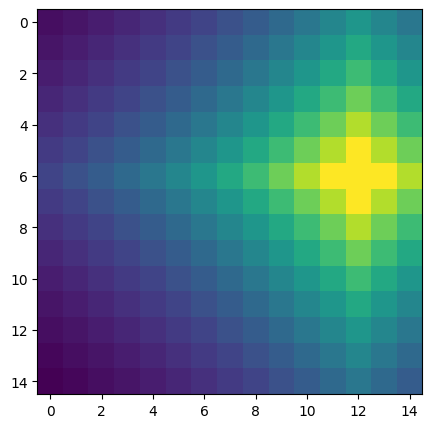

In [5]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))

# get grid size
grid_size = int(np.sqrt(n_states))

ax.imshow(values.reshape(grid_size, grid_size), interpolation='nearest')